# Image Classification

### Libraries:

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import tensorflow.keras.datasets as dataset
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

2023-01-09 23:33:47.480829: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-09 23:33:47.888395: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-09 23:33:47.888463: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-09 23:33:49.632204: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Model Building:

 - Using Model Subclassing API.


In [36]:
class modelBuild(Model):
    
    def __init__(self, num_classCateg):
        super().__init__()
        
        #block-01
        self.conv_01 = layers.Conv2D(filters=42,kernel_size=(5,5), activation='relu',padding='same')
        self.maxpool_01 = layers.MaxPool2D(pool_size=(2,2), padding='same')
        self.batchNorm_01 = layers.BatchNormalization(axis=1)

        #block-02
        self.conv_02 = layers.Conv2D(filters=50,kernel_size=(3,3), activation='relu', padding='same')
        self.maxpool_02 = layers.MaxPool2D(pool_size=(2,2), padding='same')
        self.batchNorm_02 = layers.BatchNormalization(axis=1)

        #block-03
        self.conv_03 = layers.Conv2D(filters=35,kernel_size=(3,3), activation='relu', padding='same')
        self.maxpool_03 = layers.GlobalAvgPool2D()
        self.batchNorm_03 = layers.BatchNormalization(axis=1)

        #Flatten
        self.flatten = layers.Flatten()

        #block-04
        self.dense_01 = layers.Dense(units=60, activation='relu')
        self.batchNorm_04 = layers.BatchNormalization(axis=1)
        
        #block-05
        self.dense_02 = layers.Dense(units=65, activation='relu')
        self.batchNorm_05 = layers.BatchNormalization(axis=1)
        
        #Ouput
        self.ouput = layers.Dense(num_classCateg, activation='softmax')

    
    
    def call(self, inputs):
        
        x = inputs
        
        #block_01
        x = self.conv_01(x)
        x = self.maxpool_01(x)
        x = self.batchNorm_01(x)  
        #block_02
        x = self.conv_02(x) 
        x = self.maxpool_02(x)
        x = self.batchNorm_02(x)
        #block_03
        x = self.conv_03(x)
        x = self.maxpool_02(x)
        x = self.batchNorm_03(x)
        
        #flatten
        x = self.flatten(x)
        
        #block_04
        x = self.dense_01(x)
        x = self.batchNorm_04(x)
        #block_05
        x = self.dense_02(x)
        x = self.batchNorm_05(x)
        
        #output
        return Model()
        
        

### Importing Image Dataset:

In [37]:
img_data = dataset.cifar10

(x_train, y_train), (x_test, y_test) = img_data.load_data()


### Important Manipulation of dimensions & Dtype of input data & Normalizing the data:


In [38]:
#increase the dims of x_train, x_test from 3D to 4D as model accepts 4D input data
# x_train = np.expand_dims(x_train, axis=3)
# x_test = np.expand_dims(x_test, axis=3)


# datatype earlier was uint9 which doesn't accepted by the model hence have to typecast it 
# TYPE CASTED THE DATA AS WELL AS NORMALIZED ITS VALUE

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### CNN model Compilation

In [39]:
model = modelBuild(10)

# compile (Backpropogation)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# fit
model.fit(x_train, y_train, epochs=4,
                    validation_data=(x_test, y_test))  # validation data -> dataset for testing the model 


model.summary()

Epoch 1/4


2023-01-10 00:45:00.796017: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
/home/shoaib/anaconda3/lib/python3.9/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 59s 37ms/step - loss: 1.5043 - accuracy: 0.4593 - val_loss: 1.3642 - val_accuracy: 0.5211
Epoch 2/4
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1375 - accuracy: 0.5972 - val_loss: 1.0550 - val_accuracy: 0.6212
Epoch 3/4
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0005 - accuracy: 0.6480 - val_loss: 1.2658 - val_accuracy: 0.5830
Epoch 4/4
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9215 - accuracy: 0.6754 - val_loss: 1.4499 - val_accuracy: 0.5424
Model: "model_build_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           multiple                  3192      
                                                                 
 max_pooling2d_7 (MaxPooling  multiple                 0         
 2D)                                                             
           

In [24]:
def predictModel(model, x_test):
    
    class_name = {0:'airplane', 1:'automobile', 2:'bird', 
              3:'cat', 4:'deer', 5:'dog', 6:'frog', 
              7:'horse', 8:'ship', 9:"truck"}

    # taking random value/image from x_test
    x = np.random.randint(0,len(x_test))
    
    # predicting random image probability belonging to which class 
    prob = model.predict(x_test[x,:].reshape(1,32,32,3))
    
    # considering max probabilty value
    max_prob = np.argmax(prob)
    
    # Mapping the max probablity with the dictinary of the dataset class
    predImage =  class_name.get(max_prob)
    
    # for making cross checking easier
    plt.imshow(x_test[x,:])
    print(prob)
    print(max_prob)
    
    return predImage

1/1 [==============================] - 0s 16ms/step
[[5.1763898e-04 9.9301285e-01 4.0386748e-04 5.9048616e-04 4.5253943e-05
  4.6760216e-04 2.4131787e-04 2.6604816e-05 7.4753293e-04 3.9469609e-03]]
1


IMAGE: automobile


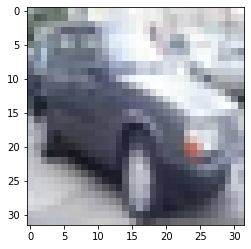

In [27]:
# calling the predictModel
predVal = predictModel(model, x_test)


print("\n")
print("IMAGE:",predVal)

### Save trained model;


In [1]:
# To save your trained model:
model.save('CNN_03_model')
    

NameError: name 'model' is not defined

### load model:

In [ ]:
# To load a model back in memory from an unzipped model folder:

model = tf.keras.models.load_model('CNN_03_model')


#now do ur predictions
model.predict()